In [37]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [38]:
# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * X**2 + np.random.randn(100, 1)

In [39]:
# Polynomial regression using gradient descent
degree = 2  # Degree of the polynomial
learning_rate = 0.01
n_iterations = 1000

In [40]:
# Create a pipeline with polynomial features and standard scaling
model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), SGDRegressor(max_iter=n_iterations, eta0=learning_rate))

# Fit the model to the data
model.fit(X, y.ravel())

# Plot the original data and the fitted polynomial
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_new = model.predict(X_new)

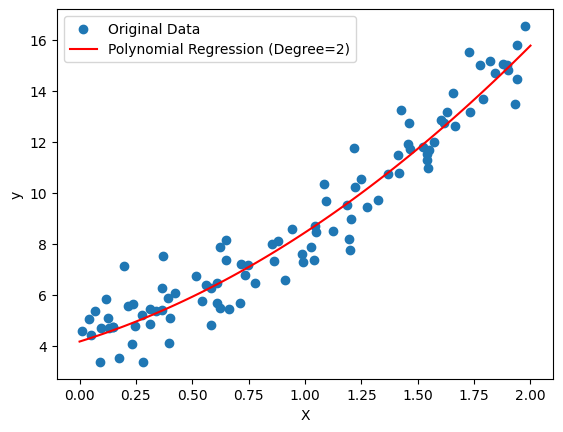

In [41]:
plt.scatter(X, y, label='Original Data')
plt.plot(X_new, y_new, 'r-', label=f'Polynomial Regression (Degree={degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()